# Procedural generation with a single qubit

In this tutorial we will do some procedural generation with a qubit. If you don't know what a qubit is, that's perfect! I'll also give a full introduction. 

## Introducing Qubits

Qubits are the basic building block of quantum computers. They are essentially the quantum version of a bit, but that description only makes much sense for those who know about quantum and about bits. For those who are neither a quantum mechanic nor an information theorist, we will be diving in to all the relevant details.

This tutorial focusses entirely on the properties of just one single qubit. This means that I won't manage to convince you that they will form the basis of a new and revolutionary kind of computation, just as you can't explain normal computers using just a single bit. Instead I will show you that qubits are useful for at least something. Specifically, to procedurally generate a map.

### The basic properties of qubits

It would probably be good to start by overexplaining what a normal bit is. Even though they have become a ubiquitous concept in our increasingly digital world, they are not something that people spend much time thinking about.

A bit is simply the smallest possible chunk of information. It can take one of two possible values, which we typically call `0` and `1`. We can use bits to store binary values. For example, if we are recording whether we have won or lost a game, we could use `1` for a win and `0` for a loss. To read out the information, we simply look at the value that was recorded.

Now let's underexplain what it means for something to be quantum. One fundamental property of quantum objects is that they must be described by multiple incompatible attributes. This means that there are attributes of the object that cannot simultaneously be well-defined: If one is defined with absolute certainty, the others must be completely ambiguous. 

This is not the easiest concept to grasp, since it not a type of behaviour that we recognize from the large, non-quantum objects of our everyday life. If we know the size of an apple, for example, its colour does not suddently become undefined. Nevertheless, such things are true of quantum objects. Qubits have been specifically created to be the easiest quantum object for us to access and manipulate. So by playing with them, we can start to build up some intuition about this quantum behaviour.

We now know enough to write down some rules that any quantum bit must obey.

1. As a type of bit, it can only give us values of `0` and `1`.
2. As a quantum object, it has multiple incomptatible attributes.
3. As a type of bit, it can store no more than a single binary value.

Put 1 and 2 together, and you find that a qubit must have multiple attributes that can be measured, but all must give values of only `0` or `1`. Put 2 and 3 together and you find that 

only one of these attributes can be useful to store a binary value at any one time. This is because assigning a definite value for one of the attributes forces the others to be completely random.

## Qubits in practice

### The quantum circuit

To learn more, it's time to move on from theory and actually start playing with a qubit. We'll do this using [Qiskit](https://qiskit.org): the Python-based framework for quantum computation. This can be used to simulate small numbers of qubits, but also to use IBM's real quantum devices over the cloud.

The first job in using Qiskit is to import the neccessary tools.

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi

The basic workflow of is first to create a so-called *quantum circuit*. This is just the life history of a group of qubits, from their initialization, through whatever manipulations we apply to them, until a binary output is finally extracted.

Here is an example of the type of circuit we'll be using in this tutorial.

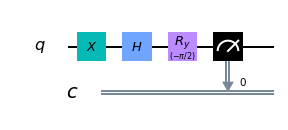

In [2]:
qc = QuantumCircuit(1,1) # create a circuit called qc, with 1 qubit, and 1 bit of output at the end
q,b = 0,0 # the qubit and bit are both labelled 0 when there is just one of each
qc.x(q) # apply an x gate to the qubit
qc.h(b) # apply an h gate to the qubit
qc.ry(-pi/2,q) # apply an ry gate for an angle of -pi/2 radians to the qubit
qc.measure(q,b) # extract a bit from the qubit, and write it to our output bit

qc.draw(output='mpl') # display the circuit as a diagram

Don't worry if this doesn't make any sense. We'll look into all these elements as we go.

The circuit is a set of instructions for a set of qubits. To actually get an output, we have to run it. For a few qubits, we can simulate the process on a normal computer. This is what we'll do here, since we'll only use one qubit in this tutorial.

The fact that there can be randomness in the output of a qubit means that we often run a circuit multiple times to get a range of samples. Here's the command to simulate our circuit `qc` using Qiskit. This runs the circuit ten times and then return the resulting ten outputs as a list. You don't need to worry about the syntax too much, as most of it is there to handle uses cases that we won't care about in this tutorial. Just know that this is hown you run things.

In [3]:
execute( qc ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

For this circuit, all the results came out `1`. As we'll see, that won't always be the case.

### A freshly made qubit

From now on, we'll always deal with two separate circuits for our qubit. One will be called `qc`, and contain all the manipulations we want to do before extracting an output.

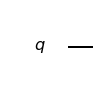

In [4]:
qc = QuantumCircuit(1)
qc.draw(output='mpl')

In this example we created a freshly initialized qubit, and  do nothing to it. This qubit therefore remains in its freshly initialized state. To find out how this behaves, we'll need to extract an output.

This is done using measurement circuits, which contain only what is needed to extract different types of output. The most commonly used method is the one we used before. It is is known as the z measurement, and can be implemented using the circuit `m_z` below.

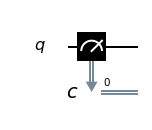

In [5]:
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)
m_z.draw(output='mpl')

To extract an output from `qc` using the z measurement, we simply add the two circuits together to make one that we can run.

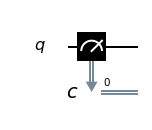

In [6]:
measured_circuit = qc+m_z
measured_circuit.draw(output='mpl')

So let's run it!

In [7]:
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

As you can see, the output is always `0` for a freshly initialized qubit when we use `m_z`. For another perspective, we can use the x measurement. This is done with the following circuit, `m_x`.

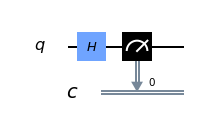

In [8]:
m_x = QuantumCircuit(1,1)
m_x.h(0)
m_x.measure(0,0)
m_x.draw(output='mpl')

As you might have noticed, this requires an extra element compared to `m_z`. This is because Qiskit doesn't allow us to ask for the x measurement directly, and so we need to use a little hack. Once you are an expert on qubits, you'll be able to see what job the `h` here is doing. But until then, just be content that it is doing its job.

Here's what our freshly initialized qubit looks like from the perspective of `m_x`.

In [9]:
measured_circuit = qc + m_x
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '1', '1', '1', '1', '0', '1', '1', '1', '1']

The result is random.

To see the probability, we need to extract more results. For this it is more convenient to get the results in a less verbose form, which simply lists each type of result along with the number of samples for which it occurred. The syntax for this is as follows, for 1000 samples.

In [10]:
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()

{'0': 486, '1': 514}

Here the two possible results, `0` and `1`, both occur roughly 500 times out of the 1000 total samples. From this we can conclude that the results are completely random, giving `0` or `1` with 50/50 probability.

There are actually an infinite number of ways to extract an output from a qubit. But we can create a complete description by using just three. The x and z measurements are two of them. It probably won't suprise you to learn that the last is the y measurement.

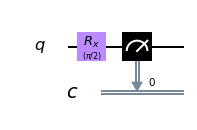

In [11]:
m_y = QuantumCircuit(1,1)
m_y.rx(pi/2,0)
m_y.measure(0,0)
m_y.draw(output='mpl')

Let's try this on our freshly initialized qubit.

In [12]:
measured_circuit = qc + m_y
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '1', '1', '0', '0', '0', '0', '0', '0', '0']

Again, the output is random. With more samples, we can confirm that it is again 50/50.

Now we know all there is to know about a freshly initialized qubit. It is certain to give an output of `0` for `m_z`, but gives random results for the other two.

### The `x` gate

Now let's see what happens when we add in the operation known as the `x` gate.

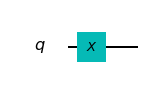

In [13]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

Since we are now well acquainted with all the important ways to get an output, let's just run them all. We can define a function to do this for us, for a given `qc`.

In [14]:
def show_results(qc):
    results_x = execute( qc + m_x ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for an x measurement:',results_x)
    results_y = execute( qc + m_y ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for a  y measurement:',results_y)
    results_z = execute( qc + m_z ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for a  z measurement:',results_z)

Then we simply run it.

In [15]:
show_results(qc)

Results for an x measurement: {'0': 490, '1': 510}
Results for a  y measurement: {'0': 484, '1': 516}
Results for a  z measurement: {'1': 1000}


Here we again get random results for `m_x` and `m_y`, but for `m_z` we are instead certain to get a `1`. The `x` gate simply flips the bit value that is output for `m_z`. If we add another `x` to the circuit

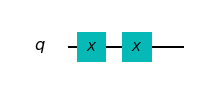

In [16]:
qc.x(0)
qc.draw(output='mpl')

the effect is to flip the value back to `0`.

In [17]:
show_results(qc)

Results for an x measurement: {'0': 469, '1': 531}
Results for a  y measurement: {'0': 491, '1': 509}
Results for a  z measurement: {'0': 1000}


### The `h`  and `rx` gates

The next operation to look at is the `h` gate

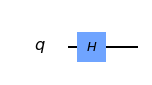

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

We can dive straight in and see what this does.

In [19]:
show_results(qc)

Results for an x measurement: {'0': 1000}
Results for a  y measurement: {'0': 501, '1': 499}
Results for a  z measurement: {'0': 503, '1': 497}


The effect is to make it so `m_x` is now the one whose output is certain. The output of `m_z` becomes random, to ensure that the qubit cannot store more than one bit.

A similar effect can be done using a gate known as `ry`. However, this requires an additional parameter: an angle expressed in radians. For now, we'll just use the angle $-\pi/2$.

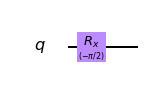

In [20]:
qc = QuantumCircuit(1)
qc.rx(-pi/2,q)
qc.draw(output='mpl')

This has the effect of making the outputs of `m_y` certain, and the other two random.

In [21]:
show_results(qc)

Results for an x measurement: {'0': 507, '1': 493}
Results for a  y measurement: {'0': 1000}
Results for a  z measurement: {'0': 496, '1': 504}


With the gates we have so far, we are able to move set the output of a qubit to be `0` or `1`, and also to change which types of output are certain and which are random. These represent the most basic kinds of operations, known as the Clifford gates.

### The Bloch sphere

The simplest way to move beyond the Clifford gates is to revisit `rx`, and simply use an angle that is not a multiple of $\pi/2$. Specifically, let's use $\pi/4$.

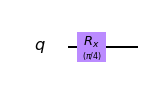

In [22]:
qc = QuantumCircuit(1)
qc.rx(pi/4,q)
qc.draw(output='mpl')

The results for this will not be as clear cut as we've seen before.

In [23]:
show_results(qc)

Results for an x measurement: {'0': 504, '1': 496}
Results for a  y measurement: {'0': 130, '1': 870}
Results for a  z measurement: {'0': 834, '1': 166}


Here we find that the resullts from `m_x` are completely random, but the other two are not. The results from `m_z` have some randomness, but with a bias towards `0`. The results from `m_y` are similarly random but with a bias towards `1`. The limited certainty of the qubit has therefore been shared between these two possible types of output. Both are mostly, but not completely certain of what output to give.

To full understand what is happening here, we need a way of visualizing the results.

Specifcially, we will plot the probability for the outcomes `0` and `1` for each of the three types of measurement on a 3D plot. Since this is well known to be a useful thing to do, it has a name: The Bloch sphere. Qiskit also has a tool to help us do it.

In [24]:
from qiskit.visualization import *

All we need do is get the results to be plotted. Here is a function that runs all the required circuits, and then process the results to put them in the format needed by the plotting tool.

In [25]:
def get_bloch(qc):
    
    shots = 2**14 # number of samples used for statistics
    
    # get results for m_x, m_y and m_z
    results_x = execute( qc + m_x ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()    
    results_y = execute( qc + m_y ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    results_z = execute( qc + m_z ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    
    # process the results
    bloch_vector = [] # list that will hold results in the form needed by the Bloch sphere
    for results in [results_x,results_y,results_z]:
        #calculate probabilities for outputs 0 and 1
        probs = {}
        for output in ['0','1']:
            if output in results:
                probs[output] = results[output]/shots
            else:
                probs[output] = 0
        # the bloch vector needs the different between these values
        bloch_vector.append( probs['0'] -  probs['1'] )
        
    return bloch_vector

Let's first try it out on an empty circuit.

In [26]:
qc = QuantumCircuit(1,1)

Remember that this circuit outputs a `0` with certainty for a z measurement, but is random for the others.

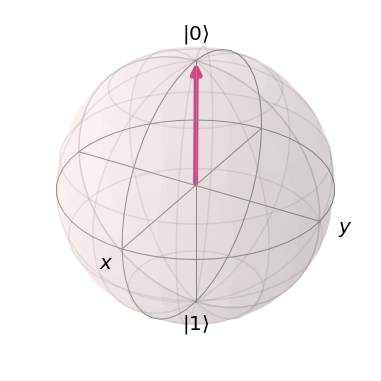

In [27]:
plot_bloch_vector(get_bloch(qc))

The state of the qubit is represented as a point in 3D space. The x, y and z axes are used to show the probabilities for x, y and z measurements, respectively. If the output is certain to be `0` for each measurement, the qubit state is depicted on one extreme along the corresponding axis. If it is certain to be `1`, it is depicted on the other side. For a completely random result, it is in the middle.

In this case the certainty of a `0` for the z measurement puts the point at the very top of the image. For the x and y axes, the point lies in the middle.

Now let's see what happens when the z measurement is certain to output `1`.

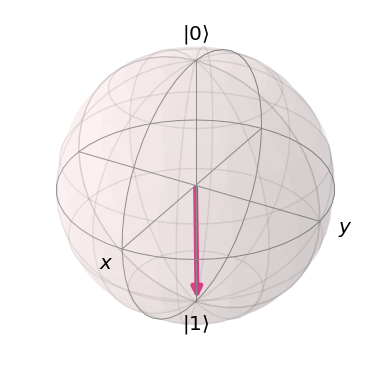

In [28]:
qc = QuantumCircuit(1,1)
qc.x(0)

plot_bloch_vector(get_bloch(qc))

Here the point is at the bottom. So the positions of these completely opposing outcomes are completely opposing points.

Now let's look at qubits that are certain of their outputs for the x measurement. First for `0`.

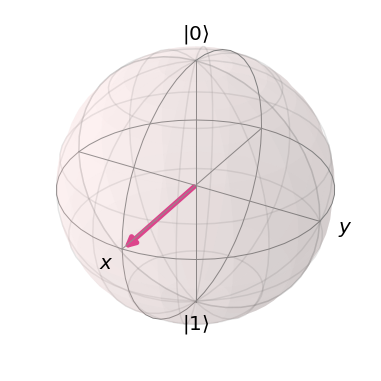

In [29]:
qc = QuantumCircuit(1,1)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

Now we will construct a circuit that is certain to output `1` for an x measurement. As we should expect, the corresponding point lies on the opposite side to the one above.

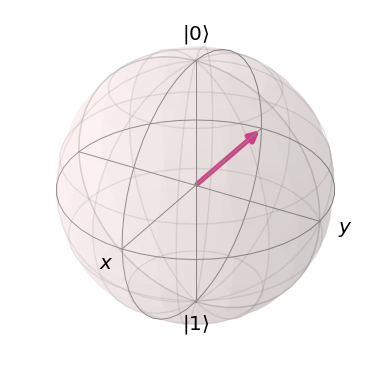

In [30]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

Now let's look at the effect of `ry`. First for an angle of $-\pi/8$

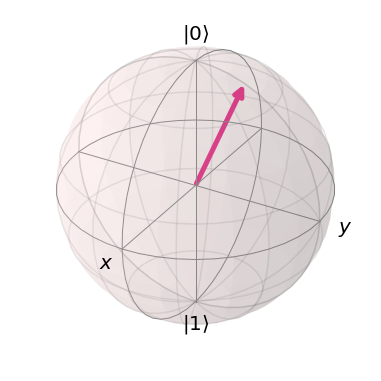

In [31]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/8,0)

plot_bloch_vector(get_bloch(qc))

Now for $-\pi/4$.

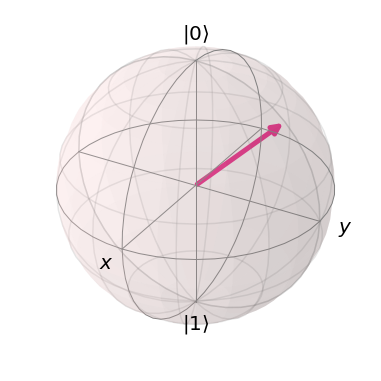

In [32]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/4,0)

plot_bloch_vector(get_bloch(qc))

Finally for $-\pi/2$.

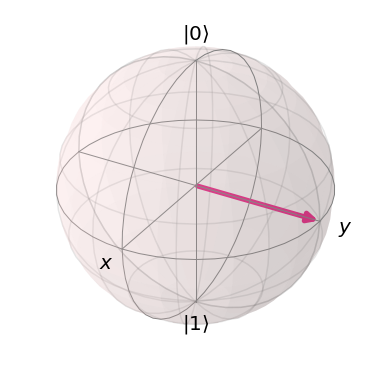

In [33]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/2,0)

plot_bloch_vector(get_bloch(qc))

The qubit state appears bound to the surface of a sphere, which is the consequence of the restriction on the total amount of certainty that it may have.

As we looked at the successfully larger rotations, we saw the z measurement results progressively lose certainty, and the y measurement results gain it. For $-\pi/2$ we reach the point where the result for `m_y` becomes completely certain, just as we saw earlier.

With this visualization, the effects of `rx` becomes a simple rotation around the sphere. In fact, `rx` is specifically a rotation around the x axis, by the angle given.

Since the angle is in radians, a full rotation corresponds to $2\pi$. A half rotation corresponds to $\pi$ (or $-\pi$, if we go around the other way. This moves the qubit state until it is again certain about the result for `m_z`, but is instead certain that the outcome will be `1`. In fact, `rx` for $\pi$ or $-\pi$ is simply the `x` gate that we used before.

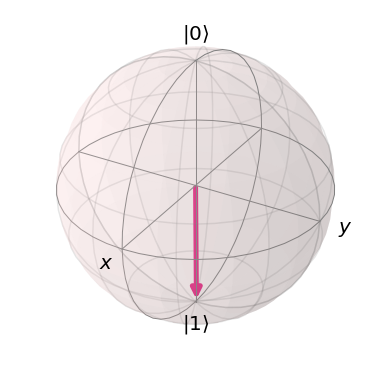

In [34]:
qc = QuantumCircuit(1,1)
qc.rx(pi,0)

plot_bloch_vector(get_bloch(qc))

There are also gates `ry` and `rz` for rotation around the y and z axes, respectively. For example, here is `ry` for $\pi/4$

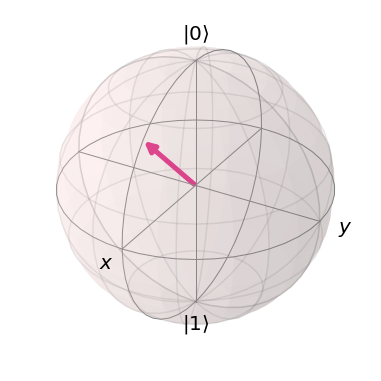

In [35]:
qc = QuantumCircuit(1,1)
qc.ry(pi/4,0)

plot_bloch_vector(get_bloch(qc))

and $\pi/2$

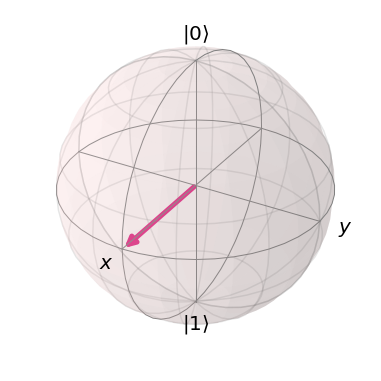

In [36]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)

plot_bloch_vector(get_bloch(qc))

This gate moves certainty between the results of `m_z` and `m_x`.

After the `ry(pi/2,0)` rotation, we could also use `rz` to move certainty between the results of `m_x` and `m_y`. For example with $\pi/4$

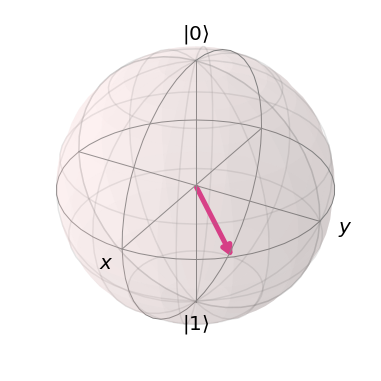

In [37]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)
qc.rz(pi/4,0)

plot_bloch_vector(get_bloch(qc))

and $\pi/2$

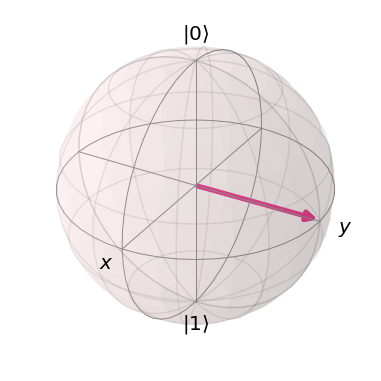

In [38]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)
qc.rz(pi/2,0)

plot_bloch_vector(get_bloch(qc))

## Single qubit terrain generation

Now you know all there is to know about a single qubit. It's time to do something with that knowledge.

One thing you could do is learn about more qubits, and how they'll combine to solve problems that would be intractable otherwise. To learn about two qubits with no maths, check out [this puzzle game](http://ibm.biz/hello-qiskit). It visualizes and explains the inner workings of two qubits. To learn about everything, check out the [Qiskit Textbook](https://community.qiskit.org/textbook/).

If you want to dive straight in to a practical project, one option is to try making a game, with a game mechanic inspired by and implemented using qubits. Multiple people have already tried this, and many of the games they've made actually use only a single qubit. This includes two of the first that were ever made, both different spins on the classic game of *Battleships*.

* [Battleships with partial NOT gates](https://medium.com/qiskit/how-to-program-a-quantum-computer-982a9329ed02)
* [Battleships with quantum measurements](https://medium.com/@decodoku/how-to-program-a-quantum-computer-part-2-f0d3eee872fe)

For more games that people have made, some with a single qubit and some with more, see [here](https://medium.com/@decodoku/the-history-of-games-for-quantum-computers-a1de98859b5a).

Another possibility is procedural generation: use qubits to generate a puzzle, some art, or a level for a game. My own first epxeriment with this was to [proceduraly generate terrain](https://medium.com/qiskit/creating-infinite-worlds-with-quantum-computing-5e998e6d21c2) using multiple qubits. More recently, I've done the same using just one. This formed the basis of my project for the [Ludum Dare 45](https://ldjam.com/events/ludum-dare/45/genesis-1) game jam. In the rest of this tutorial, I'll explain how I did it.

First, let's import some more tools.

In [39]:
from random import random
import matplotlib.pyplot as plt
from matplotlib import cm

We also need to decide the size of the map we'll generate, which is determined by the following parameter, `L`. The bigger the map is, the longer it'll take to render.

In [40]:
L = 15

Now we can define the central function behind this procedural generation algorithm: `get_height(x,y)`. This simply tells us the height of the terrain at any given point, specified by the coordinates `x` and `y`.

The height in this function is calculated using a single qubit quantum circuit. Specifically, gates are applied that depend upon the coordinates of the point. These are chosen quite arbitrarily, so feel free to play around with alternatives. 

The gates are chosen such that the circuit for any position is quite similar to that for its neighbours. There is a single `rx` rotation, for which the angle changes by `pi/32` as we move from point to point along the x axis of the map. Similarly, there is an `ry` for which the angle changes by `pi/32` as we move along the y axis of the map. The fact that the x axis of the map is used to control the `rx` rotation, and the y axis is used for `ry`, does not reflect any deep meaning. There is no connection between the x and y axes of the map and those of the Bloch sphere. It just seemed like a nice choice to me, so that's what I did.

After these gates, a z measurement is performed and the probability of getting the output `1` is calculated. This probability could itself be used as the height. However, as you'll see if you try simply returning `p`, this results in too little sea and too large snow fields. To bias the output a little towards low ground, we instead return `p`$^2$.

In [41]:
def get_height(x,y):
    
    qc = QuantumCircuit(1,1)
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations to create island shape
    qc.rx((1/32)*x*pi,0) 
    qc.ry((1/32)*y*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/1000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

To see what kind of terrain this generates, we need to calculate the height of all points on our map. The cell below does this, and stores them in an array `z`. This will take a little while to run.

In [42]:
z = [ [get_height(x,y) for x in range(-L,L)] for y in range(-L,L) ]

Now we can draw the map.

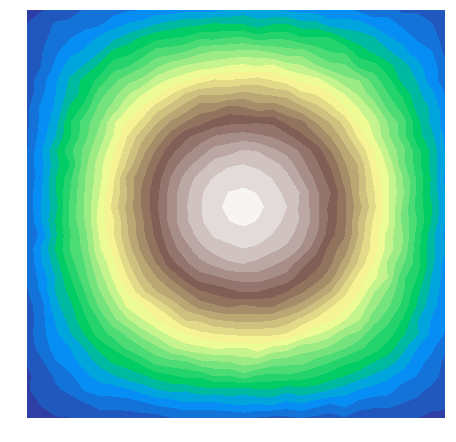

In [43]:
def plot_z(z,L):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(L/2,L/2)
    cs = ax.contourf(z,25,cmap=cm.get_cmap('terrain'))
    plt.axis('off')
    plt.show()
    
plot_z(z,L)

It is unmistakably and island. Which is nice. But it isn't a very interesting or realistic one.

To make it nicer, we can add some more gates. As one example, we could break the island up into an archipelago by adding more gates, for which the angles of rotation make larger changes as we move from one point to its neighbours.

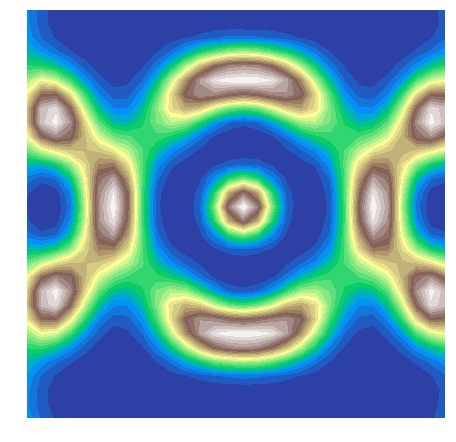

In [44]:
def get_height(x,y):
    
    qc = QuantumCircuit(1,1)
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations
    qc.rx((1/32)*x*pi,0) 
    qc.ry((1/32)*y*pi,0)
    qc.rx((1/16)*x*pi,0)
    qc.ry((1/16)*y*pi,0)
    qc.rx((1/8)*x*pi,0)
    qc.ry((1/8)*y*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/10000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

z = [ [get_height(x,y) for x in range(-L,L)] for y in range(-L,L) ]   
plot_z(z,L)

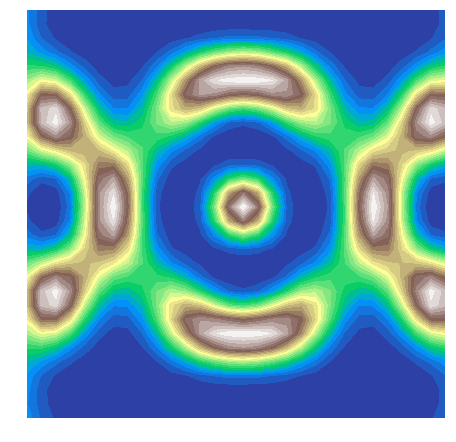

In [45]:
z = [ [get_height(x,y) for x in range(-L,L)] for y in range(-L,L) ]   
plot_z(z,L)

This is still not very realistic. For that we should add a randomly generated seed. That's exactly what I did for Ludum Dare 45, a game jam with the theme 'Start with nothing'. This inspired me to use the path take the seed from the (presumably random) path taken as the player explores the world. In that way, the player ends up creating the world as they explore it.

Specifically, I keep track of how far the player is from the starting point. Once they reach a certain distance for the first time, their position is recorded in a list named `seed`. Then if we look at an entry `seed[d]`, we are given the coordinates `xs` and `ys` where the player first reached the distance `d`. These positions are then used when calculated heights, along with the actual coordinates of each point as before.

Specifically, I do it as in the following function. This is a bit different than in my actual Ludum Dare entry, but the principle is the same. Again, the choices are a bit arbitrary, so feel free to play around. What I did is basically the same as the first example we looked at, but with `x` replaced by `(x+xs)/2` and `y` by `(y+ys)/2`.

In [46]:
def get_height(x,y,seed):
    
    qc = QuantumCircuit(1,1)
    
    # get seed positions for this distance
    d = max(abs(x),abs(y))
    (xs,ys) = seed[d]
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations to create island shape
    qc.rx((1/32)*((x+xs)/2)*pi,0) 
    qc.ry((1/32)*((y+ys)/2)*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/1000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

Before we look at it, we need to generate a seed. Since we don't actually want an interactive game in this tutorial, you won't be generating it by playing. Instead we'll generate one by making a random walk.

Note that we don't define distance from the initial point in the normal way (which would be`d=(x**2+y**2)**0.5`). Instead we use `d = max(abs(x),abs(y))`.

In [47]:
def generate_seed(L):
    seed = [(0,0)]
    x,y = 0,0
    d = 0
    while d<L:
        if random()<0.5:
            x += 1
        else:
            y += 1
        d = max(abs(x),abs(y))
        if d>=len(seed):
            seed += [(x,y)]*(d+1-len(seed))    
    return seed

Let's take a quick look at the seed we have generated. As we expect, it is a list of coordinates that get increasing far from the center.

In [48]:
seed = generate_seed(L)
print(seed)

[(0, 0), (0, 1), (0, 2), (0, 3), (3, 4), (5, 4), (6, 5), (7, 5), (8, 7), (9, 8), (10, 9), (10, 11), (11, 12), (12, 13), (13, 14), (15, 14)]


Now we have enough information to take a look at our new terrain.

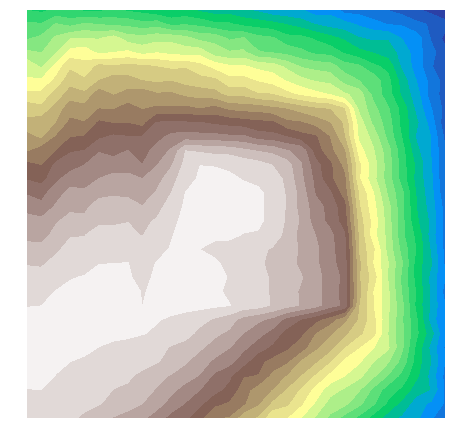

In [49]:
seed = generate_seed(L)
z = [ [get_height(x,y,seed) for x in range(-L,L)] for y in range(-L,L) ]   
plot_z(z,L)

This is now a bit more realistic and engaging than what we started with. It is still a bit blocky: and artefect of certain choices we made to keep things simple. So try out changing and adding gates in the circuit, and see what you can produce.